# INTRODUCTION

In this project we will create a Recurrent Neural Network model using LSTM layers with Dropout Regularization implemented, to predict stock prices of Google.

The dataset is Google Stock Prices taken over a 5 year period, and we will be predicting for 2017.

The project has been completed using TensorFlow and Keras frameworks, and other essential python libraries.

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the training set

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# We're going to train our RNN only on the training set. Once training is done, we will introduce the test set so it can make predictions.

dataset_train = pd.read_csv(r"/content/drive/My Drive/Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values   # We are taking only the column "Open" of the dataframe

training_set # Checking the results

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [5]:
# We will use Normalisation here using MinMaxScaler class of sklearn

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled # Checking the values

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [7]:
# The RNN will keep in mind the 60 days (3 months) before, and then output predict the next one.
# Lesser timesteps have lead to overfitting; this 60 days timestep worked perfectly.

# X train will contain 60 days before, and y_train will have the next predicted output

# we will initiate two empty lists...
X_train = []
y_train = []

# we will do a for loop to put in all the values - "i" is our index value to be predicted
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [9]:
# Now we will convert these variables X_train and y_train to numpy arrays for keras to handle easily

X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [10]:
# We will now add more dimensionality to the arrays created by using the reshape function

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train # Checking the data

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [12]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [13]:
# Adding the first LSTM Layer

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

In [14]:
# Adding Dropout regularization to prevent overfitting, we will drop 20% of the LSTM neurons will be ignored during training
# That is, 10 neurons ignored during training in forward and backpropagation

regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [16]:
# Adding the second LSTM layer

regressor.add(LSTM(units=50, return_sequences=True))

# Adding the same Dropout regularization
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [17]:
# Adding the third LSTM layer

regressor.add(LSTM(units=50, return_sequences=True))

# Adding the same Dropout regularization
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [18]:
# Adding the fourth LSTM layer (we will remove return_sequences parameter here as it is the last LSTM layer)

regressor.add(LSTM(units=50))

# Adding the same Dropout regularization
regressor.add(Dropout(0.2))

### Adding the output layer

In [19]:
# Adding the output layer

regressor.add(Dense(units=1))

### Compiling the RNN

In [20]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

### Fitting the RNN to the Training set

In [21]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 14s 132ms/step - loss: 0.0472
Epoch 2/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0082
Epoch 3/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0065
Epoch 4/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0063
Epoch 8/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 7s 174ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0054
Epoch 11/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0052
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [22]:
# Importing the test dataset

dataset_test = pd.read_csv(r"/content/drive/My Drive/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values   # We are taking only the column "Open" of the dataframe

real_stock_price # Checking the results

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [24]:
real_stock_price.shape  # Check the shape

(20, 1)

### Getting the predicted stock price of 2017

In [31]:
# Concatenating the original dataframes

dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

print(inputs.shape) # checking the shape
print("-" *20)
inputs  # Checking the variable

(80, 1)
--------------------


array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [32]:
# we will initiate an empty list...
X_test = []

# we will do a for loop to put in all the values - "i" is our index value to be predicted
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test.shape # Checking the shape

(20, 60, 1)

In [33]:
# Doing the predictions with X_test

predicted_stock_price = regressor.predict(X_test)

# Inversing the scaling of the prediction to get the real value of the stock price

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

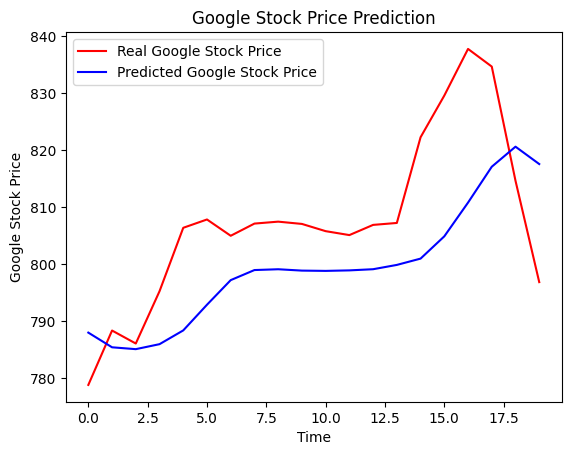

In [35]:
# We will plot between real_stock_price vs predicted_stock_price variables to check everything

plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

# CONCLUSION

In some parts of the prediction, we see our predictions lagging behind, which is common and normal. Future variations in stock price are independent of the past afterall. But our model reacts well to smooth changes (not the abrupt spikes). In the part of the predictions where spikes are involved, our model lags but otherwise, for smooth changes, it predicts well.